# Bite Size Bayes

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Review

[In the previous notebook](https://colab.research.google.com/github/AllenDowney/BiteSizeBayes/blob/master/10_joint.ipynb) 

In [4]:
def pmf_from_seq(seq):
    """Make a PMF from a sequence of values.
    
    seq: sequence
    
    returns: Series representing a PMF
    """
    pmf = pd.Series(seq).value_counts(sort=False).sort_index()
    pmf /= pmf.sum()
    return pmf

In [5]:
# more functions

## How tall is A?

Suppose I choose two people from the population of adult males in the U.S., and call them A and B.  If A is taller than B, how tall is A?

Two answer this question:

1. I'll use background information about the height of men in the U.S. to form a prior distribution of height,

2. I'll construct a joint distribution of height for A and B, and update it with the information that A is talled, and 

3. I'll extract from the posterior joint distribution the posterior distribution of height for A.

In [30]:
mean = 178
std = 7.7

xs = np.linspace(mean-3*std, mean+3*std, 101)

In [31]:
from scipy.stats import norm

ps = norm(mean, std).pdf(xs)

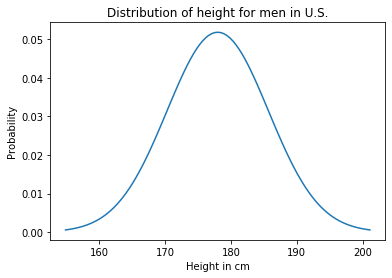

In [32]:
prior = pd.Series(ps, index=xs)
prior.plot()

plt.xlabel('Height in cm')
plt.ylabel('Probability')
plt.title('Distribution of height for men in U.S.');

In [33]:
joint_ps = np.outer(prior, prior)
joint_ps.shape

(101, 101)

In [34]:
joint = pd.DataFrame(joint_ps, index=xs, columns=xs)

In [76]:
def plot_joint(joint):
    plt.pcolormesh(joint.index, joint.index, joint)
    
    plt.xlabel('A height in cm')
    plt.ylabel('B height in cm')

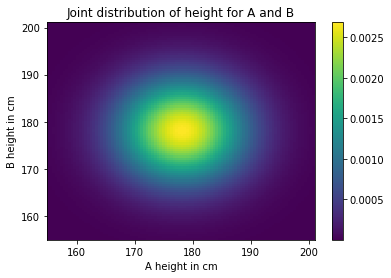

In [77]:
plot_joint(joint)
plt.colorbar()
plt.title('Joint distribution of height for A and B');

In [78]:
A = prior.index.to_numpy()[None, :]
B = prior.index.to_numpy()[:, None]

In [80]:
likelihood = pd.DataFrame(A > B, index=xs, columns=xs)

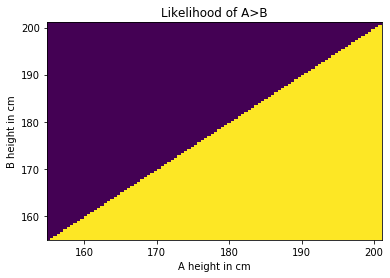

In [81]:
plot_joint(likelihood)
plt.title('Likelihood of A>B');

In [83]:
joint_posterior = joint * likelihood

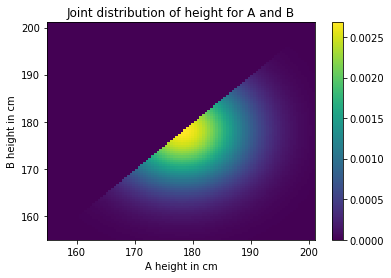

In [84]:
plot_joint(joint_posterior)
plt.colorbar()

plt.title('Joint distribution of height for A and B');

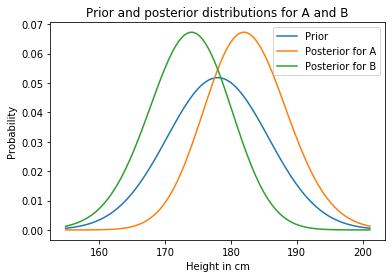

In [89]:
marginal_A = joint_posterior.sum(axis=0)
marginal_B = joint_posterior.sum(axis=1)

prior.plot(label='Prior')
marginal_A.plot(label='Posterior for A')
marginal_B.plot(label='Posterior for B')

plt.xlabel('Height in cm')
plt.ylabel('Probability')
plt.title('Prior and posterior distributions for A and B')
plt.legend();

## Distribution of a sum

If you roll a 4-sided die and a 6-sided dice, the sum of the outcomes is between 2 and 10, including both.  But as you might already know, the numbers in this range are not equally likely.

To compute the probability of each value in the range, we can compute the distribution of a sum.

First, here's a PMF that represents the possible outcomes of a single die roll, the range from 1 to 6, and their probabilities, which are all $1/6$.

In [9]:
index = range(1,7)
d6 = pd.Series(1/6, index=index)
d6

1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
6    0.166667
dtype: float64

And here's the PMF for a 4-sided die.

In [11]:
index = range(1,5)
d4 = pd.Series(1/4, index=index)
d4

1    0.25
2    0.25
3    0.25
4    0.25
dtype: float64

To compute the distribution of the sum, I'll start by creating the joint distribution of the two die rolls

In [12]:
joint = pd.DataFrame(1, index=d4.index, columns=d6.index)
joint

,1,2,3,4,5,6
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1


Each row represents the outcomes of the 4-sided; each column represents the outcomes of the 6-sided die.

Now we need to fill in the values.  Each element in this joint distribution is the probability of one pair of outcomes.  For example:

* The element at location (1, 1) is the probability of getting 1 on both dice.

* The element at location (1, 2) is the probability of getting 1 on the 4-sided die and 2 on the 6-sided die.

* The element at location (2, 1) is the probability of getting 2 on the 4-sided die and 1 on the 6-sided die.

In this example, each of these outcomes is equally likely, so we can normalize the PMF by dividing through by the sum.

In [13]:
joint /= joint.to_numpy().sum()
joint

,1,2,3,4,5,6
1,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
2,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
3,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
4,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667


The result shows that the probability of each pair is $(1/4)(1/4) \approx 0.0416$.



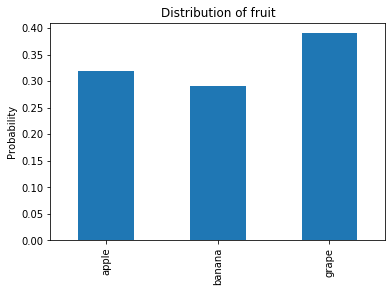

In [6]:
pmf_fruit.plot.bar(color='C0')

plt.ylabel('Probability')
plt.title('Distribution of fruit');

Similarly, here's a random sample of colors.

In [7]:
color_sample = np.random.choice(colors, 100, replace=True)

Here's the distribution of colors.

In [8]:
pmf_color = pmf_from_seq(color_sample)
pmf_color

green     0.32
red       0.33
yellow    0.35
dtype: float64

And here's what it looks like.

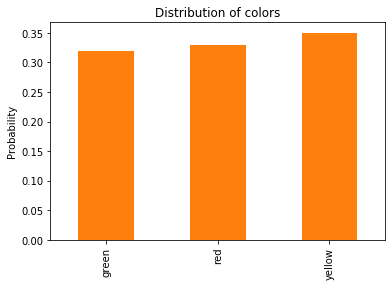

In [9]:
pmf_color.plot.bar(color='C1')

plt.ylabel('Probability')
plt.title('Distribution of colors');

Looking at these distributions, we know the proportion of each fruit, ignoring color, and the know the proportion of each color, ignoring fruit type.

But if we only have the distributions and not the original data, we don't know how many apples are green, for example, or how many yellow fruits are bananas.

We can compute that information using `crosstab`, which computes the number of cases for each combination of fruit type and color.

In [10]:
xtab = pd.crosstab(color_sample, fruit_sample, 
                   rownames=['color'], colnames=['fruit'])
xtab

fruit,apple,banana,grape
color,,,
green,11,9,12
red,12,8,13
yellow,9,12,14


The result is a DataFrame with colors along the rows and fruits along the columns.

## Heatmap

The following function plots a cross tabulation using a pseudo-color plot, also known as a heatmap.

It represents each element of the cross tabulation a square with a color that corresponds to the magnitude of the element.

The following function generates a heatmap using the Matplotlib function `pcolormesh`:

In [11]:
def plot_heatmap(xtab):
    """Make a heatmap to represent a cross tabulation.
    
    xtab: DataFrame containing a cross tabulation
    """

    plt.pcolormesh(xtab)

    # label the y axis
    ys = xtab.index
    plt.ylabel(ys.name)
    locs = np.arange(len(ys)) + 0.5
    plt.yticks(locs, ys)

    # label the x axis
    xs = xtab.columns
    plt.xlabel(xs.name)
    locs = np.arange(len(xs)) + 0.5
    plt.xticks(locs, xs)
    
    plt.colorbar()
    plt.gca().invert_yaxis()

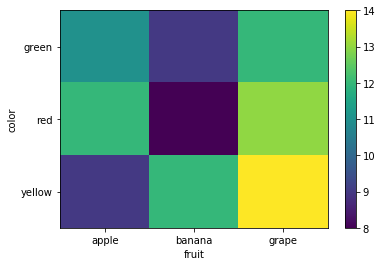

In [12]:
plot_heatmap(xtab)

## Joint Distribution

A cross tabulation represents the "joint distribution" of two variables, which is a complete description of two distributions, including all of the conditional distributions.

If we normalize `xtab` so the sum of the elements is 1, the result is a joint PMF:

In [13]:
joint = xtab / xtab.to_numpy().sum()
joint

fruit,apple,banana,grape
color,,,
green,0.11,0.09,0.12
red,0.12,0.08,0.13
yellow,0.09,0.12,0.14


Each column in the joint PMF represents the conditional distribution of color for a given fruit.

For example, we can select a column like this:

In [14]:
col = joint['apple']
col

color
green     0.11
red       0.12
yellow    0.09
Name: apple, dtype: float64

If we normalize it, we get the conditional distribution of color for a given fruit.

In [15]:
col / col.sum()

color
green     0.34375
red       0.37500
yellow    0.28125
Name: apple, dtype: float64

Each row of the cross tabulation represents the conditional distribution of fruit for each color.

If we select a row and normalize it, like this:

In [16]:
row = xtab.loc['red']
row / row.sum()

fruit
apple     0.363636
banana    0.242424
grape     0.393939
Name: red, dtype: float64

The result is the conditional distribution of fruit type for a given color.

The following function takes a joint PMF and computes conditional distributions:

In [17]:
def conditional(joint, name, value):
    """Compute a conditional distribution.
    
    joint: DataFrame representing a joint PMF
    name: string name of an axis
    value: value to condition on
    
    returns: Series representing a conditional PMF
    """
    if joint.columns.name == name:
        cond = joint[value]
    elif joint.index.name == name:
        cond = joint.loc[value]
    return cond / cond.sum()

The second argument is a string that identifies which axis we want to select; in this example, `'fruit'` means we are selecting a column, like this:

In [18]:
conditional(joint, 'fruit', 'apple')

color
green     0.34375
red       0.37500
yellow    0.28125
Name: apple, dtype: float64

And `'color'` means we are selecting a row, like this:

In [19]:
conditional(joint, 'color', 'red')

fruit
apple     0.363636
banana    0.242424
grape     0.393939
Name: red, dtype: float64

**Exercise:** Compute the conditional distribution of color for bananas.  What is the probability that a banana is yellow?

In [20]:
# Solution

cond = conditional(joint, 'fruit', 'banana')
cond

color
green     0.310345
red       0.275862
yellow    0.413793
Name: banana, dtype: float64

In [21]:
# Solution

cond['yellow']

0.41379310344827586

## Marginal distributions

Given a joint distribution, we can compute the unconditioned distribution of either variable.

If we sum along the rows, which is axis 0, we get the distribution of fruit type, regardless of color.

In [22]:
joint.sum(axis=0)

fruit
apple     0.32
banana    0.29
grape     0.39
dtype: float64

If we sum along the columns, which is axis 1, we get the distribution of color, regardless of fruit type.

In [23]:
joint.sum(axis=1)

color
green     0.32
red       0.33
yellow    0.35
dtype: float64

These distributions are called "[marginal](https://en.wikipedia.org/wiki/Marginal_distribution#Multivariate_distributions)" because of the way they are often displayed.  We'll see an example later.

As we did with conditional distributions, we can write a function that takes a joint distribution and computes the marginal distribution of a given variable:

In [24]:
def marginal(joint, name):
    """Compute a marginal distribution.
    
    joint: DataFrame representing a joint PMF
    name: string name of an axis
    
    returns: Series representing a marginal PMF
    """
    if joint.columns.name == name:
        return joint.sum(axis=0)
    elif joint.index.name == name:
        return joint.sum(axis=1)

Here's the marginal distribution of fruit.

In [25]:
pmf_fruit = marginal(joint, 'fruit')
pmf_fruit

fruit
apple     0.32
banana    0.29
grape     0.39
dtype: float64

And the marginal distribution of color:

In [26]:
pmf_color = marginal(joint, 'color')
pmf_color

color
green     0.32
red       0.33
yellow    0.35
dtype: float64

The sum of the marginal PMF is the same as the sum of the joint PMF, so if the joint PMF was normalized, the marginal PMF should be, too.

In [27]:
joint.to_numpy().sum()

1.0

In [28]:
pmf_color.sum()

1.0

However, due to floating point error, the total might not be exactly 1.

In [29]:
pmf_fruit.sum()

0.9999999999999999

**Exercise:** The following cells load the data from the General Social Survey that we used in Notebooks 1 and 2.

In [30]:
# Load the data file
import os

if not os.path.exists('gss_bayes.csv'):
    !wget https://github.com/AllenDowney/BiteSizeBayes/raw/master/gss_bayes.csv

In [31]:
gss = pd.read_csv('gss_bayes.csv', index_col=0)

As an exercise, you can use this data to explore the joint distribution of two variables:

* `partyid` encodes each respondent's political affiliation, that is, the party the belong to.  [Here's the description](https://gssdataexplorer.norc.org/variables/141/vshow).

* `polviews` encodes their political alignment on a spectrum from liberal to conservative.  [Here's the description](https://gssdataexplorer.norc.org/variables/178/vshow).

The values for `partyid` are

```
0	Strong democrat
1	Not str democrat
2	Ind,near dem
3	Independent
4	Ind,near rep
5	Not str republican
6	Strong republican
7	Other party
```

The values for `polviews` are:

```
1	Extremely liberal
2	Liberal
3	Slightly liberal
4	Moderate
5	Slightly conservative
6	Conservative
7	Extremely conservative
```

Make a cross tabulation of `gss['partyid']` and `gss['polviews']` and normalize it to make a joint PMF.


In [32]:
# Solution

xtab2 = pd.crosstab(gss['partyid'], gss['polviews'])
joint2 = xtab2 / xtab2.to_numpy().sum()

Use `plot_heatmap` to display a heatmap of the joint distribution.  What patterns do you notice?

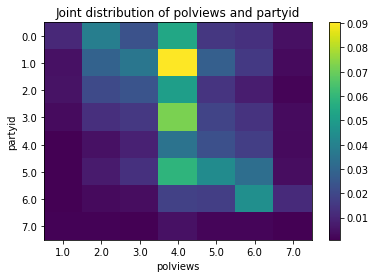

In [33]:
plot_heatmap(joint2)

plt.xlabel('polviews')
plt.title('Joint distribution of polviews and partyid');

Use `marginal` to compute the marginal distributions of `partyid` and `polviews`, and plot the results.

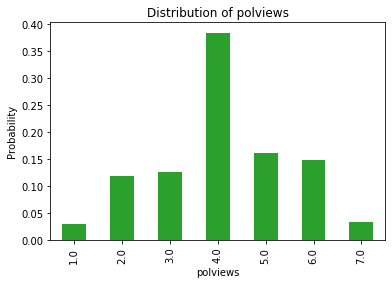

In [34]:
# Solution

marginal(joint2, 'polviews').plot.bar(color='C2')

plt.ylabel('Probability')
plt.title('Distribution of polviews');

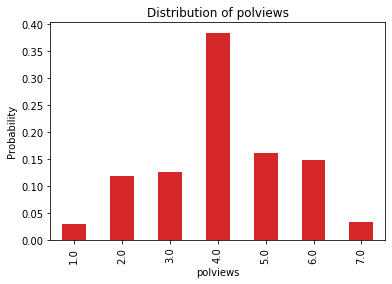

In [35]:
# Solution

marginal(joint2, 'polviews').plot.bar(color='C3')

plt.ylabel('Probability')
plt.title('Distribution of polviews');

Use `conditional` to compute the conditional distribution of `partyid` for people who identify themselves as "Extremely conservative" (`polviews==7`).  How many of them are "strong Republicans" (`partyid==6`)?

0.35297805642633234

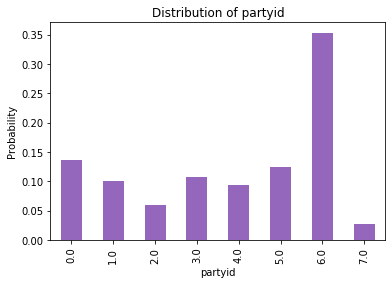

In [36]:
# Solution

cond1 = conditional(joint2, 'polviews', 7)
cond1.plot.bar(label='Extremely conservative', color='C4')

plt.ylabel('Probability')
plt.title('Distribution of partyid')

cond1[6]

Use `conditional` to compute the conditional distribution of `polviews` for people who identify themselves as "Strong Democrat" (`partyid==0`).  How many of them are "Extremely liberal" (`polviews==1`)?

0.06887366818873669

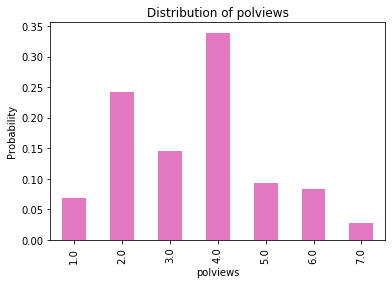

In [37]:
# Solution

cond2 = conditional(joint2, 'partyid', 0)
cond2.plot.bar(label='Strong democrat', color='C6')

plt.ylabel('Probability')
plt.title('Distribution of polviews')

cond2[1]

## Review

In this notebook

But we didn't do any Bayesian inference

[In the next notebook](https://colab.research.google.com/github/AllenDowney/BiteSizeBayes/blob/master/11_faceoff.ipynb)